<a href="https://colab.research.google.com/github/PaulToronto/Hands-on-Maching-Learning-Book/blob/main/2_End_to_End_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-End Machine Learning Project

- [Steps of a Machine Learning Project](https://github.com/PaulToronto/Math-and-Data-Science-Reference/blob/main/Steps_of_a_Machine_Learning_Project.ipynb)
    - [Appendix A: Machine Learning Project Checklist](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781098125967/app01.html)
- [List of Data Sources](https://github.com/PaulToronto/Math-and-Data-Science-Reference/blob/main/List_of_Data_Sources.ipynb)

## Imports

In [1]:
!pip install contextily

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx
import folium
import branca.colormap as cm

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import FunctionTransformer

## The Data

In [3]:
data_url = 'https://raw.githubusercontent.com/PaulToronto/Hands-on-Maching-Learning-Book/main/data/housing.csv'

## Some Terminology

- ***Multiple regression***: multiple features
- ***Multivariate regression***: predict multiple values
- ***Univariate regression***: predict a single value

## Performance Measures

### RMSE

- A typical performance measure for for regression problems is *root mean square error* (RMSE).
    - A higher weight is given to large errors
    - corresponds to the **Euclidian norm** or **l2 norm**

$$
RMSE\left(\textbf{X}, h\right) = \sqrt{
    \frac{1}{m} \sum{_{i=1}^{m}}\left(h\left(\textbf{x}^{(i)}\right) - y^{(i)}\right)^{2}
}
$$

- $m$ is the number of instances in the dataset
- $\mathbf{x}^{(i)}$ is a column vector of all the feature values (excluding the label) of the $i^{th}$ instance
- $y^{(i)}$ is the label of the $i^{th}$ instance
- $\widehat{y}^{(i)} = h\left(\textbf{x}^{(i)}\right)$
- $\mathbf{X}$ is a matrix containing all the feature values (excluding the labels) of all instances in the dataset. There is one row per instance and the $i^{th}$ row is equal to the transpose of $\mathbf{x}^{(i)}$ or $\left(\mathbf{x}^{(i)}\right)^{T}$
- $h$ is your system's prediction function, aka hypothesis

### MAE

- A less common performance measure is *mean absolute error* (MAE).
    - aka *Average Absolute Deviation*
    - Might be a better choice when there are outliers
    - corresponds to the **Manhattan norm** or **l1 norm**

$$
MAE\left(\textbf{X}, h\right) =
    \frac{1}{m} \sum_{i=1}^{m}\lvert h\left(\textbf{x}^{(i)}\right) - y^{(i)}\rvert
$$

### $l_{k}$ norm

- The higher the value if $k$, the more it focuses on large values and ignores smaller ones
- The RMSE, $l_{2}$ norm, performs well when outliers are exponentially rare (as in a bell-shaped curve)

## Steps of a Machine Learning Project

1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore and visualize the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

### Step 1: Frame the problem and look at the big picture

1. Define the objective in business terms
2. How will your solution be used?
3. What are the current solutions/workarounds (if any)?
4. How should you frame this problem?
    - Supervised/Unsupervised
    - batch/online
    - etc...
5. How should performance be measured?
6. Is the performance measure aligned with the business objective?
7. What would be the minimum performance needed to reach the business objective?
8. What are comparable problems? Can you resuse experience or tools?
9. Is human expertise available?
10. How would you solve the problem manually?
11. List the assumptions you (or others) have made so far.
12. Verify assumptions if possible.

- California census data
  - Each row is a block group
  - Block groups are the smallest geographical unit for whith the US Census Bureau publishes sample data
  - A block group typically has 600 to 3000 people
- Your model should be able to predict the median housing price in any district (block group)

#### Frame the Problem

- What is the business objective?
- Building the model is probably not the end goal
- How does the company expect to benefit from this model?
- What does the current solution (if there is one) look like?
- In our case:
    - Supervised
    - Regression (numeric labels)
        - A univariate, multiple regression problem
    - Batch learning
        
#### Select a Performance Measure

- RMSE is a typical measure for regression problems
- MAE if there are a lot of outliers

#### Check your assumptions

- Will the numeric target be used downstream?
    - If they plan to convert it to a categorical variable, maybe it's better to model this as a classification problem
    - In this case, the numeric target will be used

### Step 2: Get the Data

1. List the data you need and how much you need.
2. Find and document where you can get that data.
3. Check how much space it will take.
4. Check the legal obligations, and get authorization if necessary.
5. Get access authorizations.
6. Create a workspace (with enough storage space).
7. Get the data
8. Convert the data to a format you can easily manipulate (without changing the data itself).
9. Ensure sensitive information is deleted or protected (e.g. anonymized)
10. Check the size and type of data (time series, sample, geographical, etc.).
11. Sample a test, put it aside, and never look at it (no data snooping).

In [4]:
housing = pd.read_csv(data_url)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Notes:

- `total_bedrooms` has missing data
- `ocean_proximity` is the only categorical feature, the rest are numeric

In [5]:
# `total_bedrooms` number missing
housing['total_bedrooms'].isnull().sum()

207

In [6]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

### Step 3: Explore and visualize the data to gain insights.

Note: try to get insights from a field expert for these steps.

1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary).
2. Create a Jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:
    - Name
    - Type
    - % missing
    - Noisiness and type of noise(stochastic, outliers, rounding errors, etc.)
    - Usefulness for the task
    - Type of distribution (Gaussian, uniform, logarithmic, etc.
4. For supervised learning tasks, identify the target attribute(s)
5. Visualize the data
6. Study the correlations between attributes
7. Study how you would solve the problem manually.
8. Identify the promising transformations you may want to apply
9. Identify extra data that would be useful
10. Document what you have learned

#### Preliminary EDA

- `total_bedrooms` has missing data
- all attributes are numerical except `ocean_proximity`

In [8]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

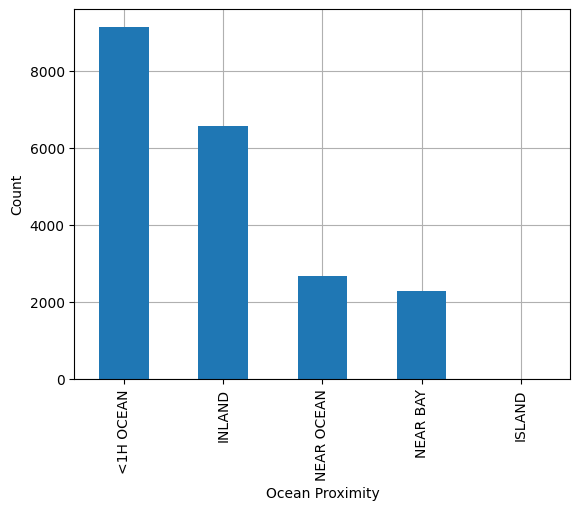

In [9]:
ax = housing['ocean_proximity'].value_counts().plot(kind='bar')

ax.set_xlabel('Ocean Proximity')
ax.set_ylabel('Count')
ax.grid()
ax.set_axisbelow(True) # controls z-order of grid

In [10]:
# use this for the order parameter in `sns.countplot()`
order_param = housing['ocean_proximity'].value_counts().index
order_param

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object', name='ocean_proximity')

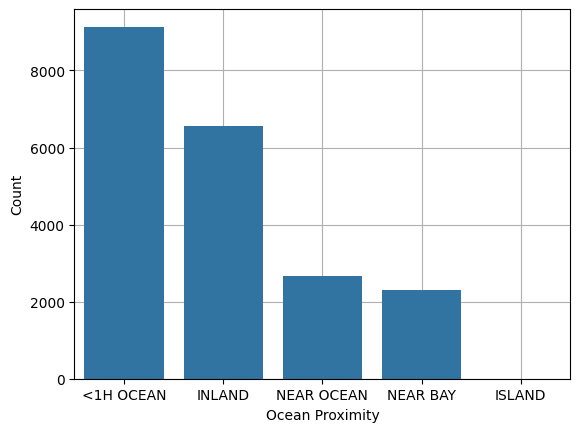

In [11]:
ax = sns.countplot(data=housing,
                   x='ocean_proximity',
                   order=order_param)

ax.set_xlabel('Ocean Proximity')
ax.set_ylabel('Count')
ax.grid()
ax.set_axisbelow(True) # controls z-order of grid

In [12]:
# null values are ignored
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

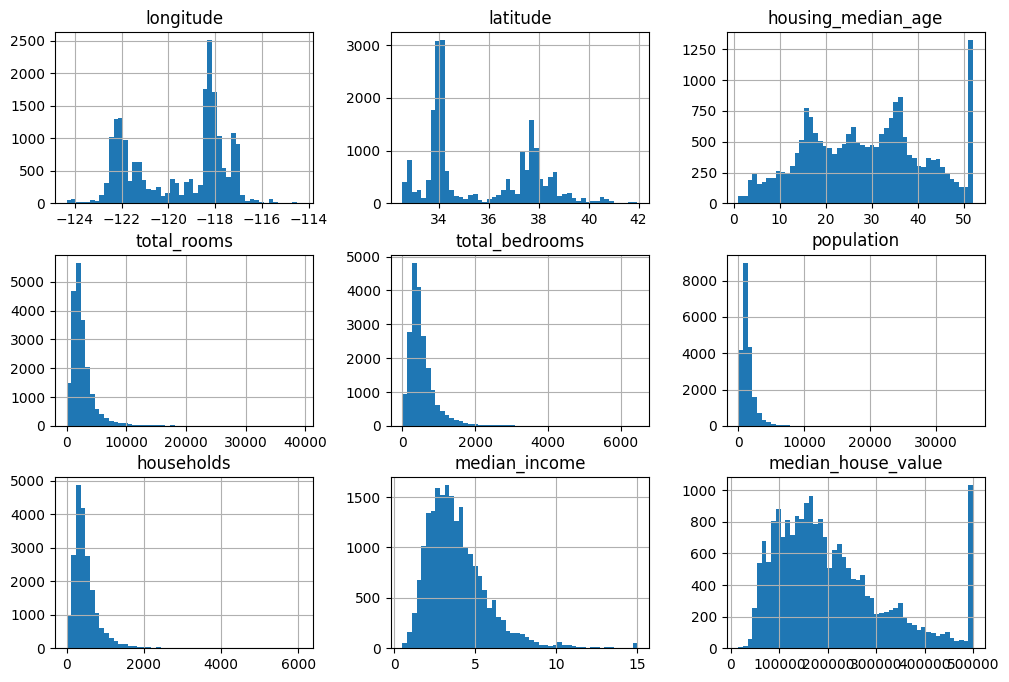

In [13]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

- `median_income` does not look like its epxressed in US dollars
    - turns out, the data has been scaled and capped at 15,00001 for higher median incomes and at 0.4999 for lower median incomes
    - 3 means roughly 30K

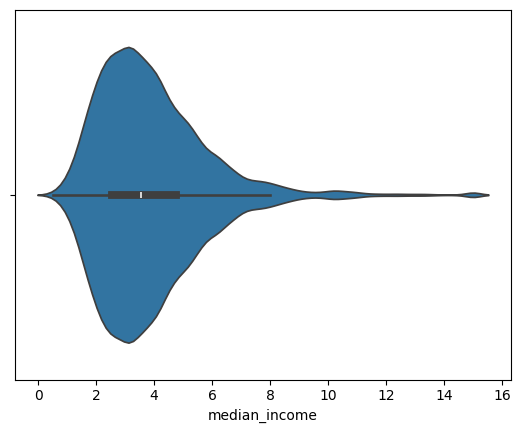

In [14]:
sns.violinplot(data=housing, x='median_income');

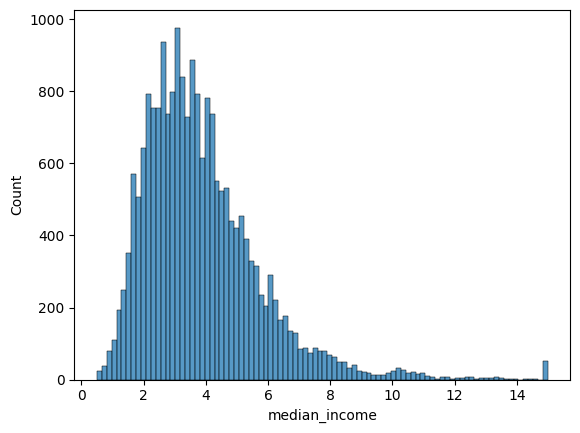

In [15]:
sns.histplot(data=housing, x='median_income');

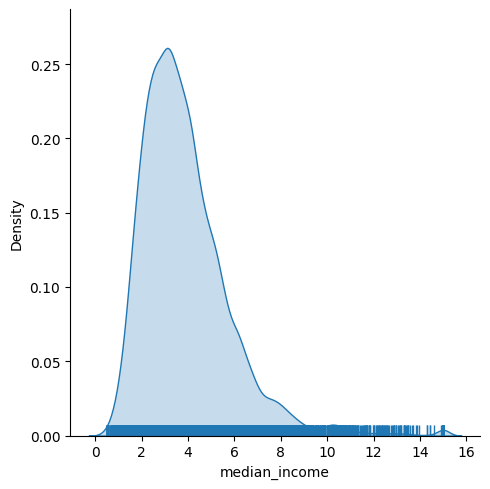

In [16]:
sns.displot(data=housing,
            x='median_income',
            kind='kde',
            fill=True,
            rug=True);

- `housing_median_age` was capped

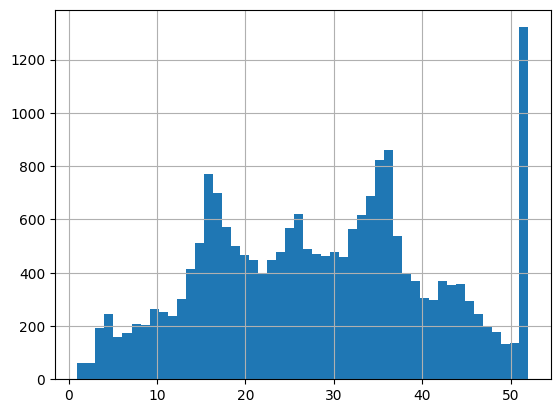

In [17]:
housing['housing_median_age'].hist(bins=50);

- `housing_median_value` was capped
    - this could be a serious problem since it is the target variable
    - two options:
        1. collect proper labels for the districts whose labels were capped
        2. remove those districts from the training and test test

<Axes: >

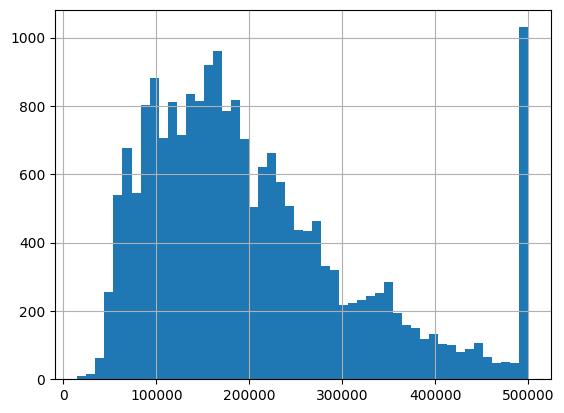

In [18]:
housing['median_house_value'].hist(bins=50)

- Other issues:
    - the attributes have very different scales
    - many of the histograms are skewed right

**IMPORTANT**: Create a test set and set it aside, no snooping

#### Create a Test Set

- the **test set** should be left alone once created
- no further EDA should be done on the test set to avoid **snooping bias**

In [19]:
train_set, test_set = train_test_split(housing,
                                       test_size=0.2,
                                       random_state=42)

train_set.shape, test_set.shape

((16512, 10), (4128, 10))

#### Create a Stratified Test Set

- With **stratified sampling**, the population is divided into homogeneous subgroups called **strata**, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population
    - for example, a survey, where it is possible that answers will vary across genders, a well conducted survey will maintain the gender ratio from the population in the sample
- Suppose domain experts tell us that median income is a very important attribute for predicting median housing prices
    - It might be a good idea to ensure that the test set is representative of the various categories of incomes in the whole dataset
    - To stratify by **median income**, we need to create `income_cat` feature
- To stratify on more than one variable: https://stackoverflow.com/questions/45516424/sklearn-train-test-split-on-pandas-stratify-by-multiple-columns

In [20]:
# parameters are:
#.  start (included in interval),
#. stop (not included),
# and step
np.arange(0, 1.5, 0.5)

array([0. , 0.5, 1. ])

In [21]:
# - open intervals use parenthesis (), does not included endpoints
# - closed intervals use square brackets [], includes endpints

test = np.concatenate([np.arange(0, 1.5, 0.5),
                       np.arange(1.5, 3.0, 0.5),
                       np.arange(3.0, 4.5, 0.5),
                       np.arange(4.5, 6.0, 0.5),
                       np.arange(6.0, 10, 0.5)
                      ])
test

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [22]:
# `pd.cut()`: right=True by default (include rightmost edge or not)

# if `bins` is a sequence of scalars, then it defins the bin edges
#. - allows for non-uniform width

test_result = pd.cut(test,
                     bins=[0, 1.5, 3, 4.5, 6, np.inf],
                     labels=[1.5, 3, 4.5, 6, np.inf],
                     right=True)

pd.DataFrame({'test': test, 'result': test_result})

test result
0    0.0    NaN
1    0.5    1.5
2    1.0    1.5
3    1.5    1.5
4    2.0    3.0
5    2.5    3.0
6    3.0    3.0
7    3.5    4.5
8    4.0    4.5
9    4.5    4.5
10   5.0    6.0
11   5.5    6.0
12   6.0    6.0
13   6.5    inf
14   7.0    inf
15   7.5    inf
16   8.0    inf
17   8.5    inf
18   9.0    inf
19   9.5    inf

##### Creating the `income_cat` feature for the stratified sample

- Notice that most median incomes are clustered around 1.5 to 6 (15K to 60K)
- Some incomes go way beyond 6
- We don't want too many categories because we want a sufficient number of instances for each stratum
    - If we don't have a sufficient number in each stratum then the stratum's importance may be biased

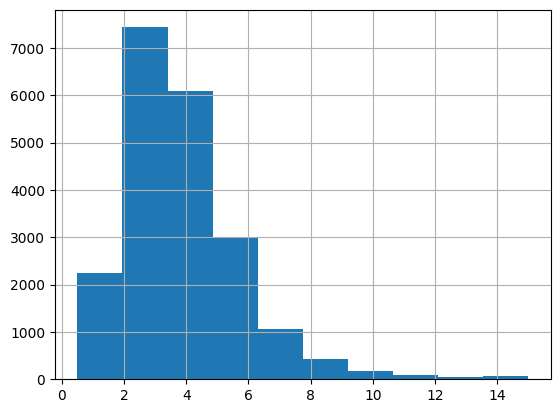

In [23]:
housing['median_income'].hist();

In [24]:
housing['median_income'].min(), housing['median_income'].max()

(0.4999, 15.0001)

In [25]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0, 1.5, 3, 4.5, 6, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [26]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


- Note about `groupby`:
    - Use `observed=False`: If you rely on seeing all levels of the income_cat categorical variable (even if some levels have no data).
	- Use `observed=True`: If you only want to group by levels that actually have data in the current DataFrame, which is often more efficient and matches the future default.

In [27]:
housing.groupby('income_cat', observed=False)['median_income'].agg(['count', 'min', 'max'])

count     min      max
income_cat                        
1             822  0.4999   1.5000
2            6581  1.5026   3.0000
3            7236  3.0021   4.5000
4            3639  4.5022   6.0000
5            2362  6.0050  15.0001

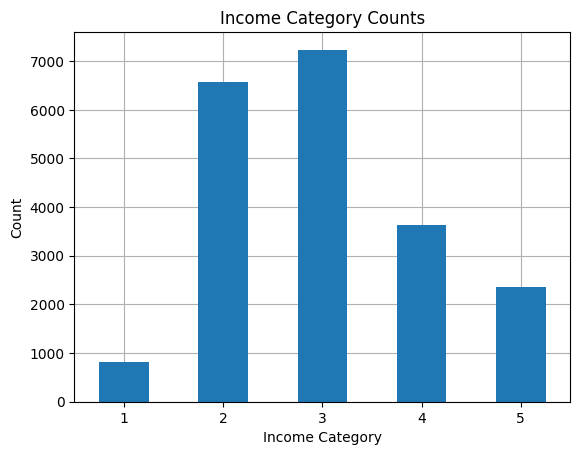

In [28]:
ax = housing['income_cat'].value_counts().sort_index().plot(kind='bar',
                                                            grid=True,
                                                            rot=0,
                                                            xlabel='Income Category',
                                                            ylabel='Count',
                                                            title='Income Category Counts')

ax.set_axisbelow(True)

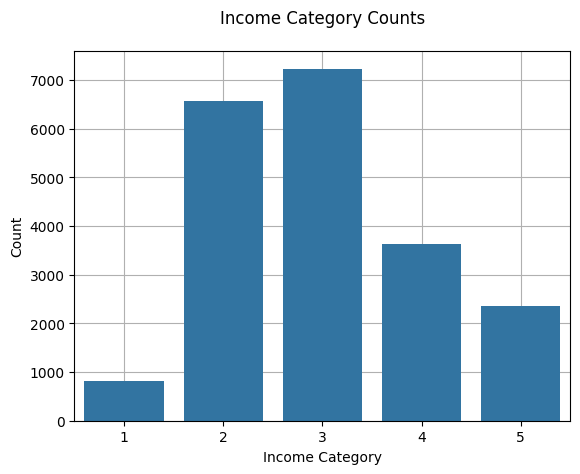

In [29]:
ax = sns.countplot(data=housing,
                   x='income_cat')

ax.set(xlabel='Income Category',
       ylabel='Count',
       axisbelow=True # so grid is under bars
       )

ax.set_title('Income Category Counts', pad=20)
ax.grid();

##### `train_test_split()` with `stratify` argument

- Note that there are a number of strategies for splitting
- `train_test_split()` is a shortcut function
- https://scikit-learn.org/stable/api/sklearn.model_selection.html

In [30]:
# we need the `income_cat` in this split as well
#. - only doing this for comparison
train_set, test_set = train_test_split(housing,
                                       test_size=0.2,
                                       random_state=42)
train_set.shape, test_set.shape

((16512, 11), (4128, 11))

In [31]:
strat_train_set, strat_test_set = train_test_split(housing,
                                                   test_size=0.2,
                                                   stratify=housing['income_cat'],
                                                   random_state=42)
strat_train_set.shape, strat_test_set.shape

((16512, 11), (4128, 11))

In [32]:
overall = housing['income_cat'].value_counts(normalize=True).sort_index() * 100
train = train_set['income_cat'].value_counts(normalize=True).sort_index() * 100
test = test_set['income_cat'].value_counts(normalize=True).sort_index() * 100
strat_train = strat_train_set['income_cat'].value_counts(normalize=True).sort_index() * 100
strat_test = strat_test_set['income_cat'].value_counts(normalize=True).sort_index() * 100

pd.DataFrame({
    'Overall %': overall,
    'Train %': train,
    'Test %': test,
    'Strat_Train %': strat_train,
    'Strat_Test %': strat_test
})

Overall %    Train %     Test %  Strat_Train %  Strat_Test %
income_cat                                                              
1            3.982558   3.918362   4.239341       3.978924      3.997093
2           31.884690  32.170543  30.741279      31.885901     31.879845
3           35.058140  35.192587  34.520349      35.059351     35.053295
4           17.630814  17.435804  18.410853      17.629603     17.635659
5           11.443798  11.282703  12.088178      11.446221     11.434109

- We no longer need the `income_cat` column, so we can drop it
- We are putting the `strat_test_set` aside to avoid snooping bias

In [33]:
strat_test_set.columns, strat_train_set.columns

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity', 'income_cat'],
       dtype='object'),
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity', 'income_cat'],
       dtype='object'))

In [34]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [35]:
strat_test_set.columns, strat_train_set.columns

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity'],
       dtype='object'),
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity'],
       dtype='object'))

In [36]:
housing = strat_train_set.copy()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


### Step 3 Continued: Explore and Visualize the Data to Gain Insights


- The first part of Step 3 was the prelimimary EDA done before creating the test set
- If the data set is too large, consider taking a random sample to use for this stage to make data manipulation easy and fast
- In our case, the data set is not too large

#### Visualizing Geographical Data

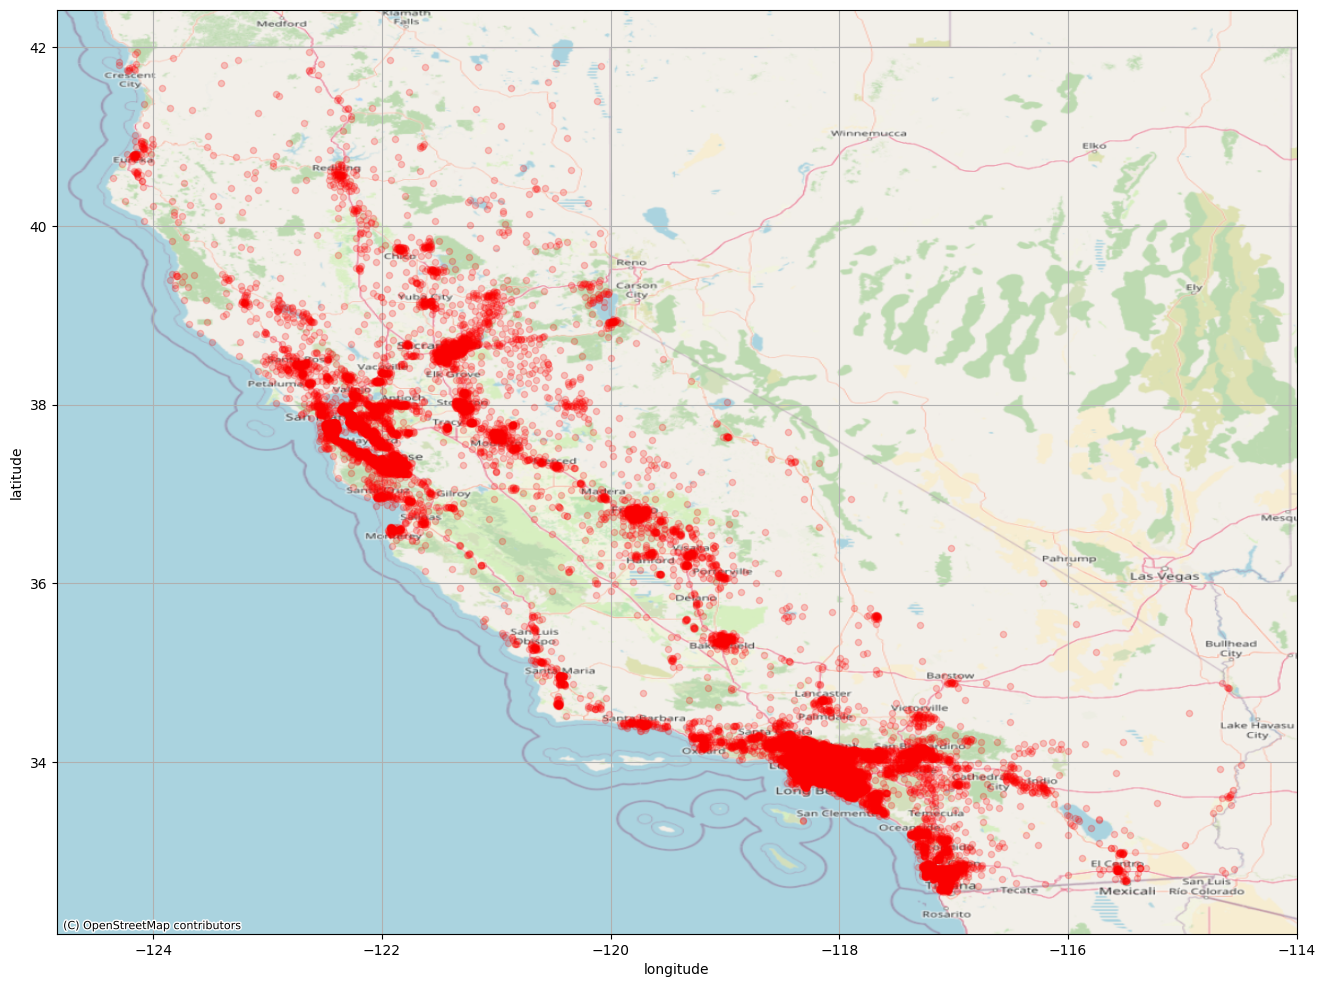

In [37]:
ax = housing.plot(kind='scatter',
                  x='longitude',
                  y='latitude',
                  alpha=0.2,
                  color='red',
                  grid=True,
                  figsize=(16, 12))
ax.set_axisbelow(True)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs='epsg:4326')

In [38]:
# this works, but folium maps don't render in GitHub

"""
m = folium.Map(location=[37, -119],
               zoom_start=6.4)

for _, row in housing.iterrows():
    folium.CircleMarker(location=(row['latitude'], row['longitude']),
                        radius=3,
                        fill=True,
                        fill_opacity=0.2,
                        color='red',
                        stroke=True,
                        weight=1,
                        popup=row['population'],
                        highlight=True,   # adds hover effects
                        tooltip='Click for population').add_to(m)

m
""";

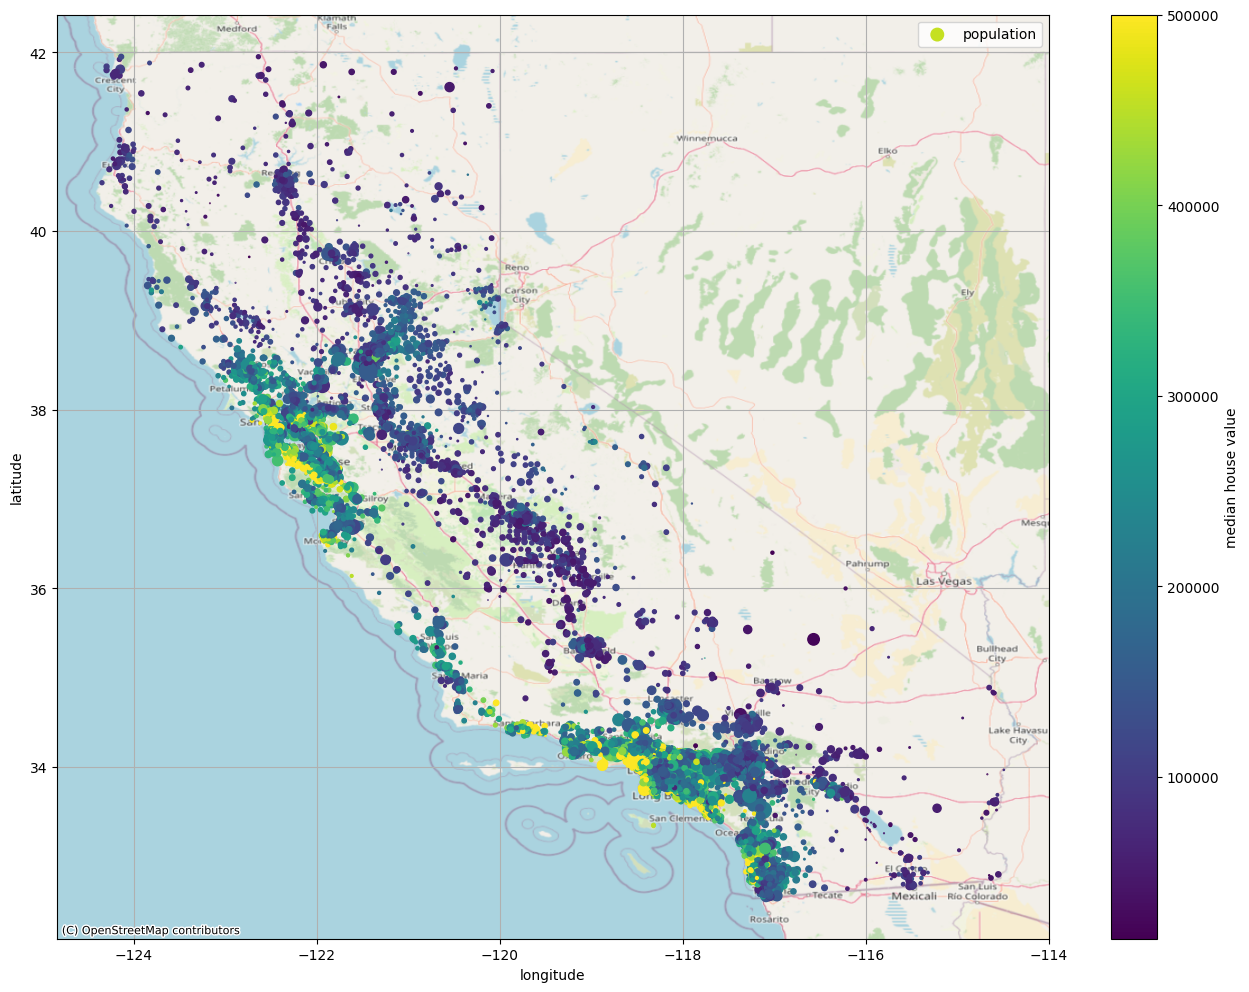

In [39]:
ax = housing.plot(kind='scatter',
                  x='longitude',
                  y='latitude',
                  s=housing['population'] / 100,
                  label='population',
                  legend=True,
                  c='median_house_value',
                  cmap='viridis',
                  colorbar=False, # we want to customize the label
                  grid=True,
                  figsize=(16, 12))

ax.set_axisbelow(True)
cbar = plt.colorbar(ax.collections[0])
cbar.set_label('median house value')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs='epsg:4326')

In [40]:
# pop_scale will be used for the radius in the next folium map
r_min = housing['population'].min()
r_max = housing['population'].max()
t_min = 2
t_max = 15

pop_scale = lambda pop : ((pop - r_min) / (r_max - r_min)) * (t_max - t_min) + t_min

pop_scale(r_min), pop_scale(r_max)

(2.0, 15.0)

In [41]:
# my_color_map is for the color in the next folium map
my_color_map = cm.linear.viridis.scale(housing['median_house_value'].min(),
                                       housing['median_house_value'].max())

my_color_map.tick_labels = [100_000, 200_000, 300_000, 400_000, 500_000]
my_color_map.caption = 'test'

In [42]:
# folium maps don't render on GitHub

"""
m = folium.Map(location=[37, -119],
               zoom_start=6.4)

for i, row in housing.iterrows():
    folium.CircleMarker(location=(row['latitude'], row['longitude']),
                        radius=pop_scale(row['population']),
                        fill_color=my_color_map(housing['median_house_value'][i]),
                        fill=True,
                        fill_opacity=0.8,
                        stroke=False).add_to(m)


my_color_map.add_to(m)
m
""";

###### What does the Geographic Visualization tell us?

- Housing prices are very much related to location
    - Close to ocean means higher price
    - Close to population centre means higher price
- A **clustering algorithm** should be useful for detecting the main clusters and for adding new features that measure proximity to the cluster centres
- The `ocean_proximity` feature may be useful as well, but it doesn't apply to Northern California

#### Look for Correlations

- Below the **standard correlation coefficient** (aka Person's r) is computed between every pair of attributes

In [43]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix.style.background_gradient(cmap='coolwarm',
                                      vmin=-1,
                                      vmax=1)

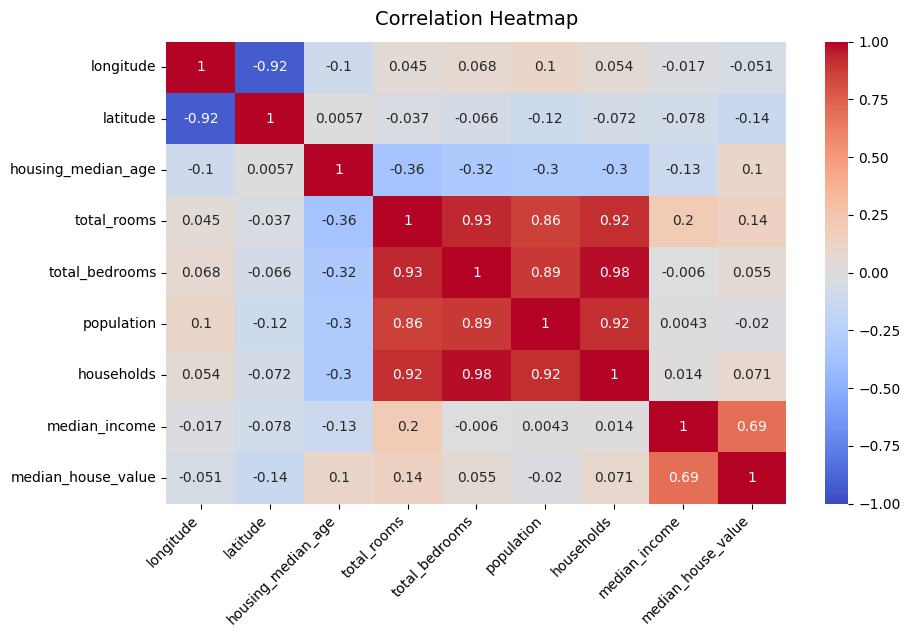

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(corr_matrix,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            annot=True, annot_kws={'fontsize': 10})

ax.set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=12)
ax.set_xticklabels(ax.get_xticklabels(), size=10, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), size=10);

In [45]:
mask = np.triu(np.ones_like(corr_matrix))
np.fill_diagonal(mask, 0)
mask

array([[0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

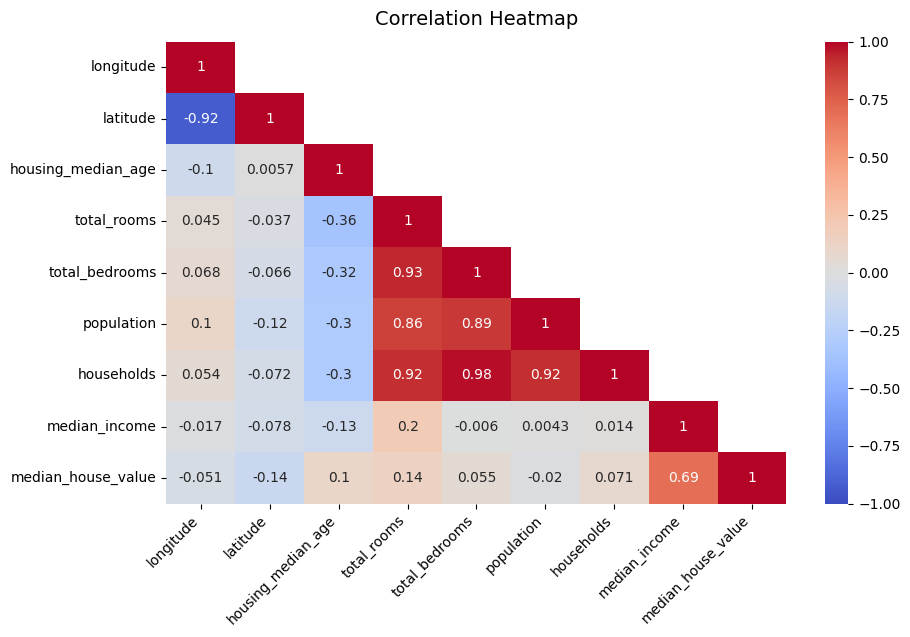

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(corr_matrix,
            mask=mask,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            annot=True, annot_kws={'fontsize': 10})

ax.set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=12)
ax.set_xticklabels(ax.get_xticklabels(), size=10, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), size=10);

- `corr_matrix` can be used to focus on how much each attribute correlates to the target variable: `median_house_value`.

In [47]:
corr_target = corr_matrix[['median_house_value']].sort_values(by='median_house_value', ascending=False)
corr_target.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

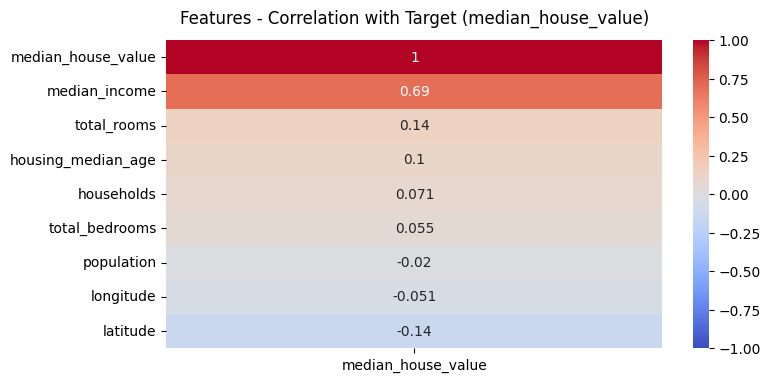

In [48]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.heatmap(corr_target,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            annot=True, annot_kws={'fontsize': 10})

ax.set_title('Features - Correlation with Target (median_house_value)', fontdict={'fontsize': 12}, pad=12);

##### Nonlinear Relationships

- The correlation coefficients only measure linear relationships
- Scatter plots can help reveal non-linear relationships

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png'>

In [49]:
# this is a handy way to get just the numeric attributes
attributes = corr_matrix.index
attributes

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

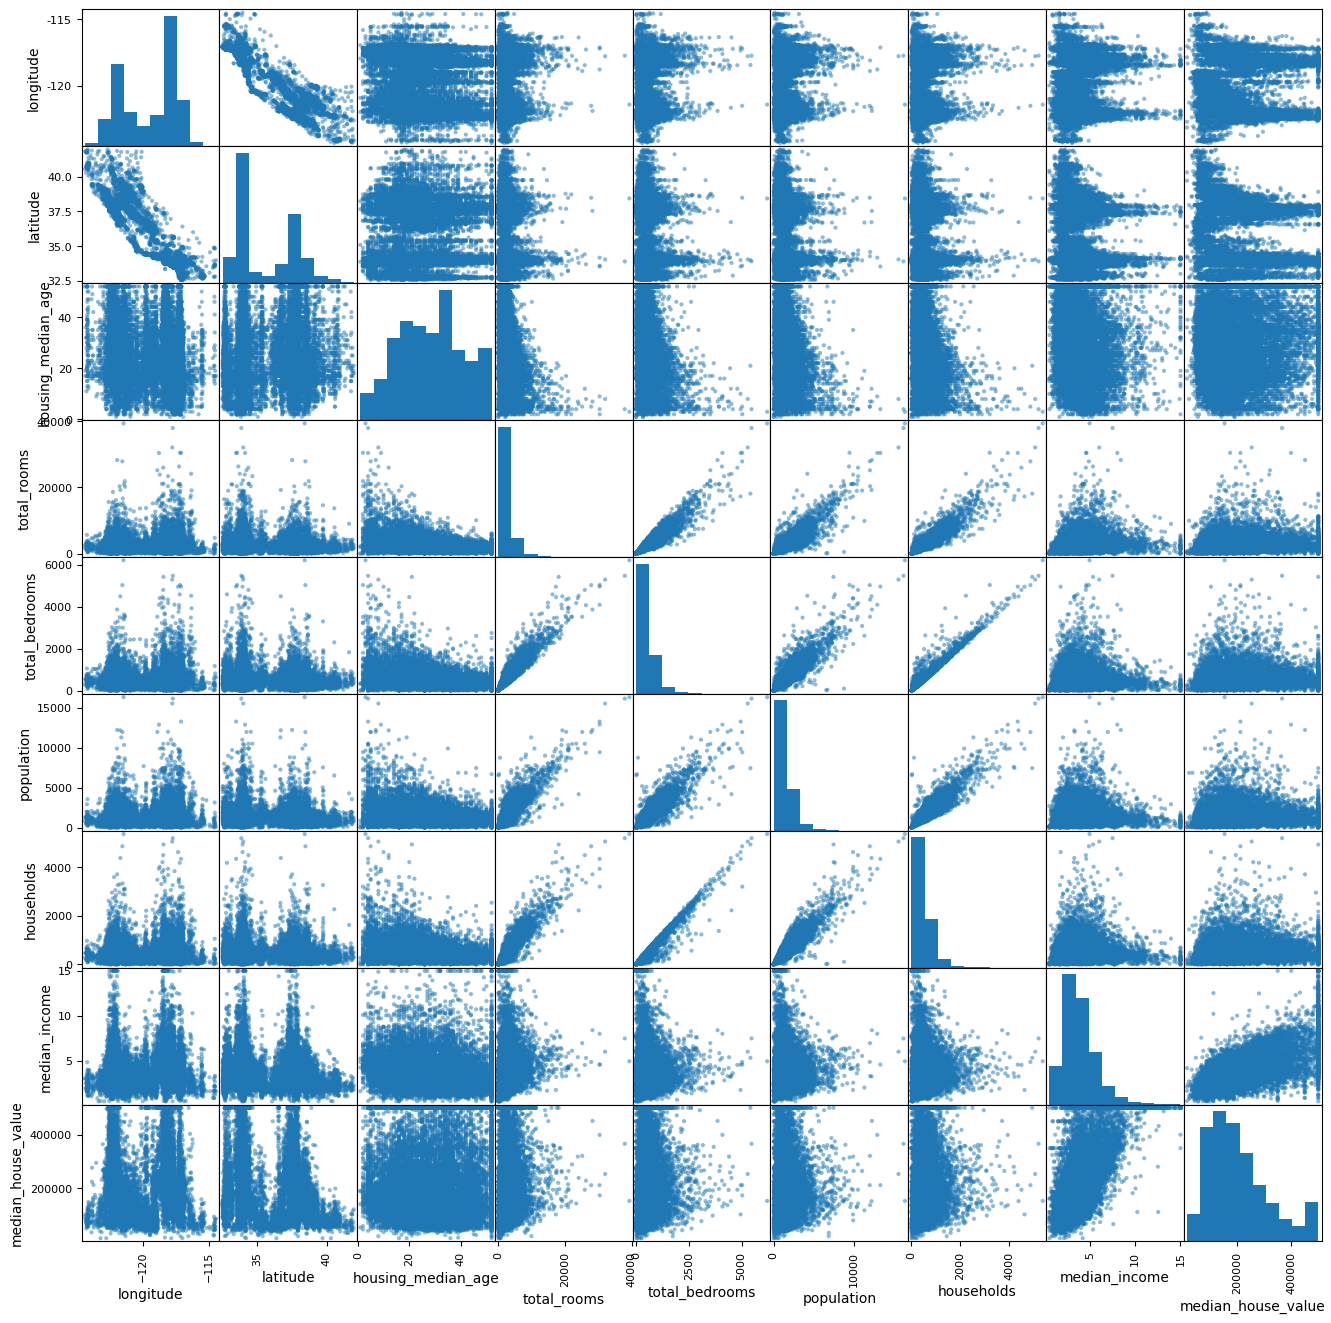

In [50]:
pd.plotting.scatter_matrix(housing[attributes], figsize=(16, 16));

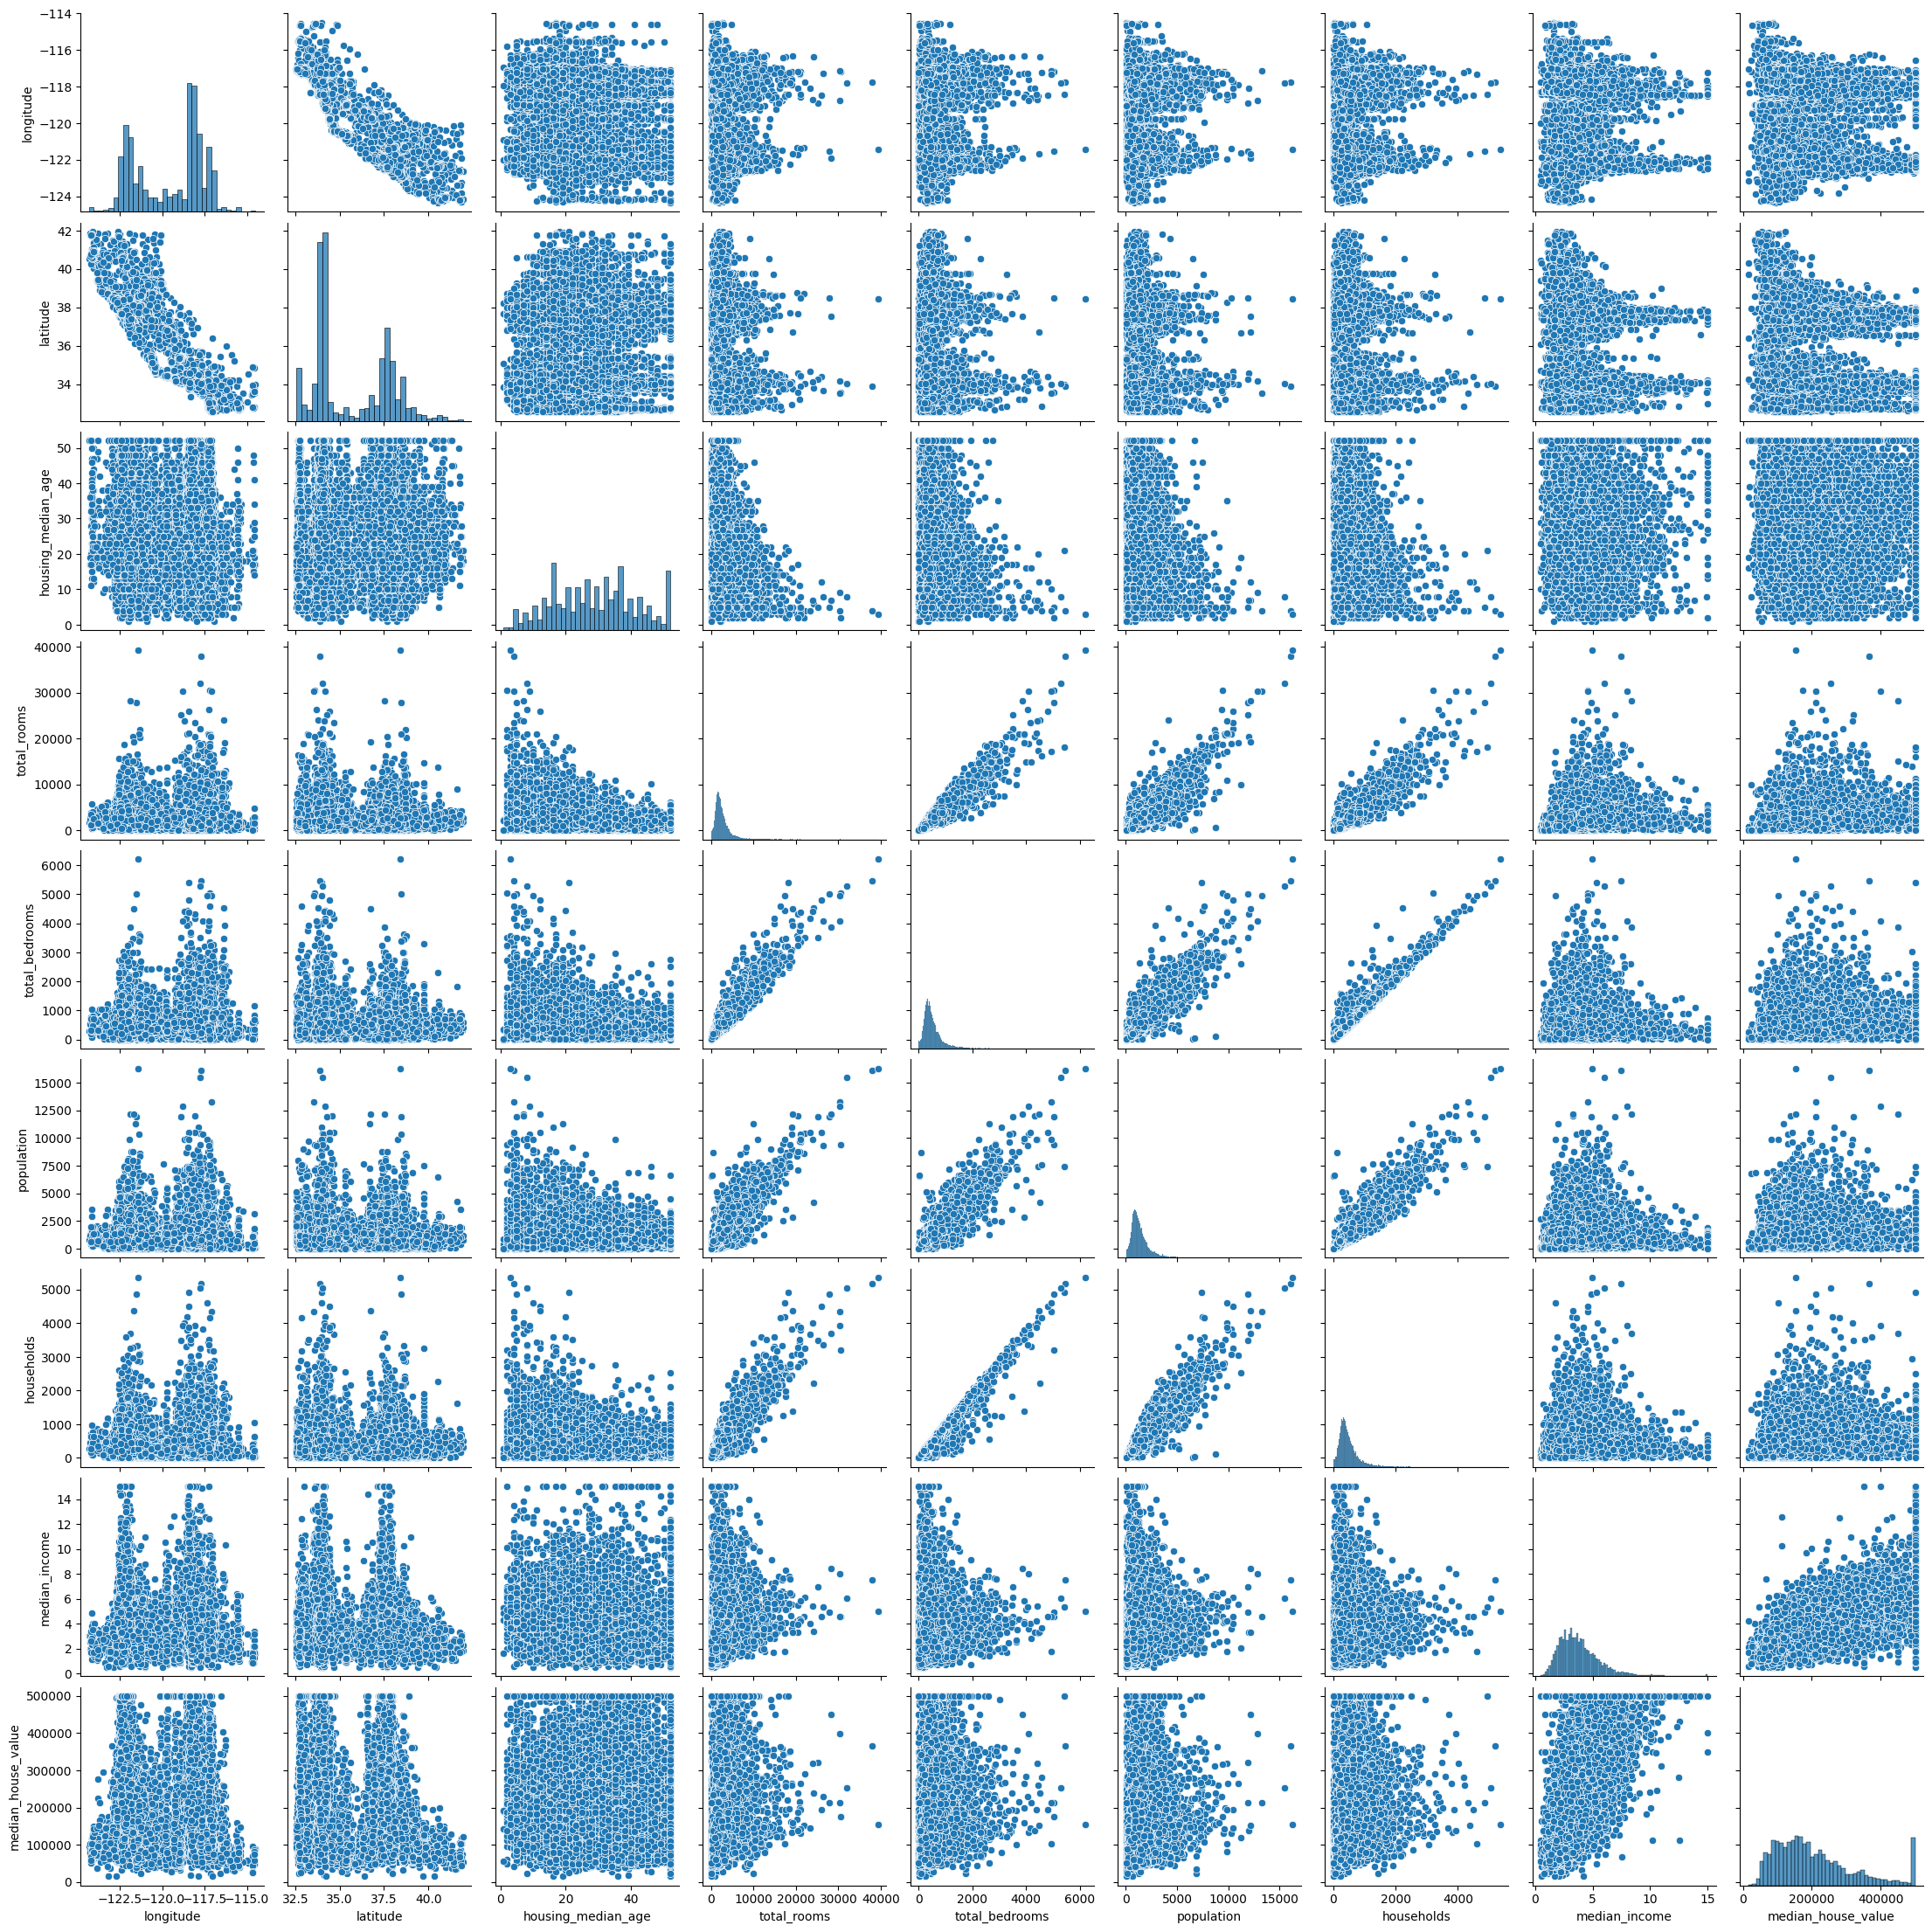

In [51]:
sns.pairplot(housing[attributes]);

##### `median_income`

- It looks like `median_income` is the most promising attribute for predicting `median_house_value`
- The correlation is quite strong: 0.69
- The price cap discussed earlier is clearly visible as the horiontal line at 500K
- The plot also reveals some other, less obvious horizontal lines
    - It might be a good idea to remove the corresponding districts to prevent your algorithm from learning to reproduce these quirks

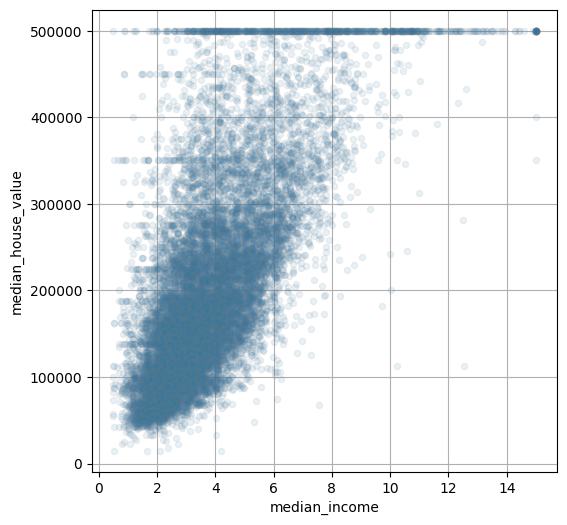

In [52]:
ax = housing.plot(kind='scatter',
                  x='median_income',
                  y='median_house_value',
                  alpha=0.1,
                  edgecolor='grey',
                  grid=True,
                  figsize=(6, 6))

ax.set_axisbelow(True)

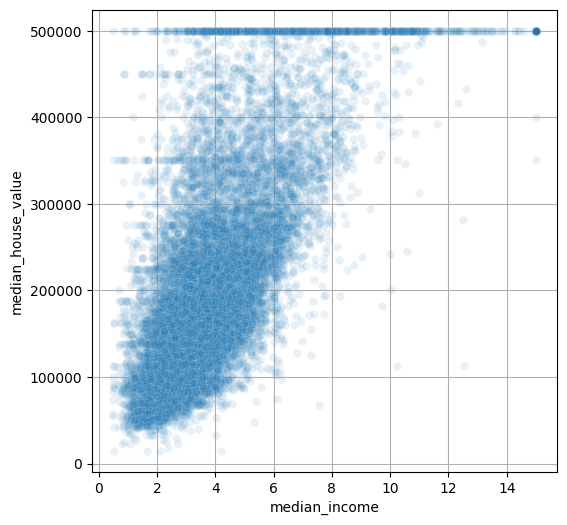

In [53]:
plt.figure(figsize=(6, 6))

ax = sns.scatterplot(data=housing,
                     x='median_income',
                     y='median_house_value',
                     alpha=0.1)

ax.set_axisbelow(True)
ax.grid()

#### Experiment with Attribute Combinations

- The total number of rooms in the district is not very useful if you don't know how many households there are.
- The number of bedrooms might be more useful it it is compared to the number of rooms
- Population per household might also be useful

In [54]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [55]:
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

In [56]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
 10  rooms_per_house     16512 non-null  float64
 11  bedrooms_ratio      16344 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [57]:
corr_matrix = housing.corr(numeric_only=True)
corr_target = corr_matrix[['median_house_value']].sort_values(by='median_house_value', ascending=False)
corr_target.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

### Step 4: Prepare the data to better expose the underlying data patterns to machine learning algorithms

Best done using functions:

- allows you to reproduce the transformations easily on any dataset
- you will gradually build up a library of transformation functions that you can reuse in future projects
- you can use these functions in your live system to transform the new data before feeding it to your algorithms
- makes it possible to try out various transformations and see which combination of tranformations works best

#### Revert to a clean training set and separate the predictors and labels

In [58]:
# note that `drop` creates a copy
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [59]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [60]:
housing_labels.head()

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64

#### Clean the Data

- `total_bedrooms` is missing data. There are 3 options for handling this:
    1. Get rid of the corresponding districts
    2. Get rid of the entire attribute
    3. Impute the missing values
        - zero, mean, median, etc.

In [61]:
housing['total_bedrooms'].isnull().sum()

168

In [62]:
# 1. Get rid of the corresponding districts
#. if we were doing this for real, we would set inplace=True
housing.dropna(subset=['total_bedrooms'], inplace=False).info()

<class 'pandas.core.frame.DataFrame'>
Index: 16344 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16344 non-null  float64
 1   latitude            16344 non-null  float64
 2   housing_median_age  16344 non-null  float64
 3   total_rooms         16344 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16344 non-null  float64
 6   households          16344 non-null  float64
 7   median_income       16344 non-null  float64
 8   ocean_proximity     16344 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [63]:
# 2. Get rid of the entire attribute
#. if we were doing this for real, we would set inplace=True
housing.drop('total_bedrooms', axis=1, inplace=False).info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   population          16512 non-null  float64
 5   households          16512 non-null  float64
 6   median_income       16512 non-null  float64
 7   ocean_proximity     16512 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [64]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [65]:
# 3. Impute the missing values
#        - zero, mean, median, etc.
the_median = housing['total_bedrooms'].median()
print(the_median)
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(the_median)
housing.info()

434.0
<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [66]:
# undo that so we can use sklearn's `SimpleImputer`
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


- Decided to go with option 3 since it is less destructive, but we will use `SimpleImputer()` to accomplish this

##### `SimpleImputer()`

- https://scikit-learn.org/1.6/modules/generated/sklearn.impute.SimpleImputer.html
- the benefit of using this is that it will store the median value (of each feature), which will make it possible to impute missing values not only on the training set, but also on the test set, the validation set and any new data fed to the model
- Three steps:
    1. Create an instance of `SimpleImputer`
    2. `.fit()` it to the data
    3. `.transform()` the data

In [67]:
# SimpleInputer only works with numeric attributes
housing_num = housing.select_dtypes(include=[np.number])
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [68]:
# 1. Create an instance of `SimpleImputer`
# - other strategy options inlude: 'mean', 'most_frequent'
# - also can be (strategy='constant', fill_value=...)
# - 'most_frequent` and `constant` support non-numerical data
imputer = SimpleImputer(strategy='median')
imputer

SimpleImputer(strategy='median')

In [69]:
# 2. `.fit()` it to the data
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [70]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


- The imputer has simply computed the median of each attribute and stored it in its `statistics_` instance variable
- Only the total_bedrooms attribute had missing values, but you can't be sure there won't be any missing values in the new data after the system goes love, so it is best to apply the imputer to all numerical attributes

In [71]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [72]:
housing.median(numeric_only=True)

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2125.0000
total_bedrooms         434.0000
population            1167.0000
households             408.0000
median_income            3.5385
dtype: float64

In [73]:
# 3. `.transform()` the data
X = imputer.transform(housing_num)
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

In [74]:
X.shape, housing_num.shape, type(X)

((16512, 8), (16512, 8), numpy.ndarray)

In [75]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [76]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [77]:
pd.DataFrame(X,
             columns=housing_num.columns,
             index=housing_num.index).info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [78]:
# still has missing values
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


##### Other (more powerful) imputers

- `KNNImputer()`
- `IterativeInputer()`
- ...

#### Scikit-Learn API

- All objects share a consistent and simple interface
    - **Estimators**: any object that can estimate some parameters based on a dataset.
        - example: `SimpleImputer()`
        - the estimatation itself is performed by the `fit()` method which takes a dataset as a parameter (or two in the case of supervised learning algorithms where one parameter is the dataset of labels)
        - all other parameters are called **hyperparameters**
            - example: the `strategy` parameter for `SimpleImputer()`
    - **Transformers**: some estimaters (such as `SimpleImputer()`) can also tranform a dataset
        - the transformation is performed by the `transform()` method, with the dataset to transform as the parameter
        - the tranformed dataset is returned by the method
        - the tranfomration generally relies on learned parameters
        - all transformers also have the convenience method `fit_transform()`
            - sometimes optimized to run faster than `fit()` followed by `tranform()`
    - **Predictors**: some estimators, given a dataset, are capable of making predictions
        - example: `LinearRegression()`
        - the prediction is done with the `predict()` method, which takes a dataset of *new instances* and returns a dataset of corresponding predictions
        - also have a `score()` method that measures the quality of the predictions (given a test set, and the corresponding labels in the case of supervised learning algorithms)
- Inspection:
    - All the estimator's hyperparameters are accessible via public instances variables
        - example: `imputer.strategy`
    - All the estimator's learned parameters are accessible via public instance variables with an underscore suffix
        - example: `imputer.statistics_`
- Composition:
    - It is easy to create a `Pipeline` estimator from an arbitrary sequence of transformers followed by a final estimator

#### Handling Text and Categorical Attributes

In [79]:
housing_num.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income  
13096      1576.0      1034.0         2.0987  
14973       666.0       357.0         6.0876  
3785        562.0       203.0         2.4330  
14689      1845.0       780.0         2.2618  
20507      1912.0      1172.0         3.5292

In [80]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

ocean_proximity
13096        NEAR BAY
14973       <1H OCEAN
3785           INLAND
14689          INLAND
20507      NEAR OCEAN

In [81]:
housing_cat['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7274
INLAND        5301
NEAR OCEAN    2089
NEAR BAY      1846
ISLAND           2
Name: count, dtype: int64

##### `OrdinalEncoder()`

- Most machine learning algorithms prefer to work with numbers
- The problem with ordinal encoding is that ML algorithms will assume that two nearby values are more similar that two distant values
    - This may be fine for ordered categories, but not for `ocean_proximity`
    - In this case, it is better to use a `OneHotEncoder()`

In [82]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder

OrdinalEncoder()

In [83]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[3.],
       [0.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]])

In [84]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [85]:
housing_cat_encoded.min(), housing_cat_encoded.max()

(0.0, 4.0)

In [86]:
pd.DataFrame(housing_cat_encoded,
             columns=housing_cat.columns,
             index=housing_cat.index).info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ocean_proximity  16512 non-null  float64
dtypes: float64(1)
memory usage: 258.0 KB


##### `OneHotEncoder()`

- has a `drop` parameter because one of the resulting attributes is redundant

In [87]:
cat_encoder = OneHotEncoder(sparse_output=True)
cat_encoder

OneHotEncoder()

In [88]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [89]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [90]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [91]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [92]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [93]:
pd.DataFrame(housing_cat_1hot.toarray(),
             columns=cat_encoder.get_feature_names_out(),
             index=housing_cat.index).head()

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
13096                        0.0                     0.0   
14973                        1.0                     0.0   
3785                         0.0                     1.0   
14689                        0.0                     1.0   
20507                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
13096                     0.0                       1.0   
14973                     0.0                       0.0   
3785                      0.0                       0.0   
14689                     0.0                       0.0   
20507                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
13096                         0.0  
14973                         0.0  
3785                          0.0  
14689                         0.0  
20507                         1.0

In [94]:
# try this again, this time with the `drop` parameter
cat_encoder_drop = OneHotEncoder(sparse_output=True, drop='first')
cat_encoder_drop

OneHotEncoder(drop='first')

In [95]:
housing_cat_1hot_drop = cat_encoder_drop.fit_transform(housing_cat)
housing_cat_1hot_drop

<16512x4 sparse matrix of type '<class 'numpy.float64'>'
	with 9238 stored elements in Compressed Sparse Row format>

In [96]:
housing_cat_1hot_drop.toarray()

array([[0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [97]:
cat_encoder_drop.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [98]:
cat_encoder_drop.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [99]:
cat_encoder_drop.get_feature_names_out()

array(['ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype=object)

In [100]:
pd.DataFrame(housing_cat_1hot_drop.toarray(),
             columns=cat_encoder_drop.get_feature_names_out(),
             index=housing_cat.index).head()

ocean_proximity_INLAND  ocean_proximity_ISLAND  \
13096                     0.0                     0.0   
14973                     0.0                     0.0   
3785                      1.0                     0.0   
14689                     1.0                     0.0   
20507                     0.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
13096                       1.0                         0.0  
14973                       0.0                         0.0  
3785                        0.0                         0.0  
14689                       0.0                         0.0  
20507                       0.0                         1.0

In [101]:
# can also use the pd.get_dummies() function
#   trouble is, it doesn't remember which categories it was trained on
#    - best to use OneHotEncoder()
pd.get_dummies(housing_cat).head()

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
13096                      False                   False   
14973                       True                   False   
3785                       False                    True   
14689                      False                    True   
20507                      False                   False   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
13096                   False                      True   
14973                   False                     False   
3785                    False                     False   
14689                   False                     False   
20507                   False                     False   

       ocean_proximity_NEAR OCEAN  
13096                       False  
14973                       False  
3785                        False  
14689                       False  
20507                        True

#### Feature Scaling and Transformation

- ML algorithms don't perform well when the input numerical attributes have very different scales
    - most models will be biased toward focusing on those attributes with a larger scale
- the two most common scaling techniques:
    1. min-max scaling (aka normalization)
    2. standardization (aka Z-score scaling)
- What if there are outliers in "new data" to which `transform()` is applied?
    - they may end up scaled outside the range
    - to avoid this, set `clip=True`

**WARNING**

- Never use `fit()` or `fit_transform()` on anyting other than the training set
- Use `tranform()` on the test test using a trained tranformer
- Note that if new data contains outliers, these may end up scaled outside of the range. To avoid this set the `clip` hyperparameter to `True`

##### `MinMaxScaler()`

Min-max scaling is also called **normalization**.

This might not be the best choice if there are outliers in the data. Consider another scaling  technique, such as standardization.

The tranformation is given by:

- `X_prime = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))`
    - `X_prime` scales between `0` and `1`
- `X_scaled = X_prime * (max - min) + min`
    - Here, `X_prime` is used to scale between the numbers `min` and `max`
- When to use:
	- When features have different ranges and you want them on the same scale.
	- When using algorithms that are sensitive to feature magnitudes (e.g., neural networks, k-NN, SVM with RBF kernel).
	- When feature values are already in a known bounded range.
- Pros:
	- Preserves relative relationships in the data.
	- Works well when data distribution is not Gaussian.
- Cons:
	- Sensitive to outliers (since it depends on min/max values).



In [102]:
test = pd.DataFrame({'X': np.arange(-5, 6)})
test

X
0  -5
1  -4
2  -3
3  -2
4  -1
5   0
6   1
7   2
8   3
9   4
10  5

In [103]:
test.X.min?

In [104]:
# manually
X_prime = (test['X'] - test['X'].min()) / (test['X'].max() - test['X'].min())
X_prime

0     0.0
1     0.1
2     0.2
3     0.3
4     0.4
5     0.5
6     0.6
7     0.7
8     0.8
9     0.9
10    1.0
Name: X, dtype: float64

In [105]:
the_max = 20
the_min = 10
X_scaled = X_prime * (the_max - the_min) + the_min
X_scaled

0     10.0
1     11.0
2     12.0
3     13.0
4     14.0
5     15.0
6     16.0
7     17.0
8     18.0
9     19.0
10    20.0
Name: X, dtype: float64

In [106]:
min_max_scale_0to1 = MinMaxScaler(feature_range=(0, 1))
min_max_scale_0to1

MinMaxScaler()

In [107]:
min_max_scale_0to1.fit_transform(test)

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ]])

In [108]:
MinMaxScaler(feature_range=(10, 20)).fit_transform(test)

array([[10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

###### Apply `MinMaxScaler()` to `housing_num` DataFrame

In [109]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
housing_num_min_max_scaled

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]])

In [110]:
scaled_df = pd.DataFrame(housing_num_min_max_scaled,
                         columns = housing_num.columns,
                         index = housing_num.index)
scaled_df.info() # works even though there are missing values

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [111]:
scaled_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096  -0.608519  0.117021            1.000000    -0.831171       -0.641166   
14973   0.210953 -0.661702            0.529412    -0.900148       -0.886294   
3785   -0.519270  0.236170            0.254902    -0.945012       -0.930424   
14689   0.468560 -0.744681           -0.372549    -0.787782       -0.726204   
20507   0.257606 -0.740426            0.372549    -0.778015       -0.610243   

       population  households  median_income  
13096   -0.807018   -0.614336      -0.779479  
14973   -0.918660   -0.867090      -0.229293  
3785    -0.931419   -0.924585      -0.733369  
14689   -0.774015   -0.709166      -0.756983  
20507   -0.765796   -0.562815      -0.582171

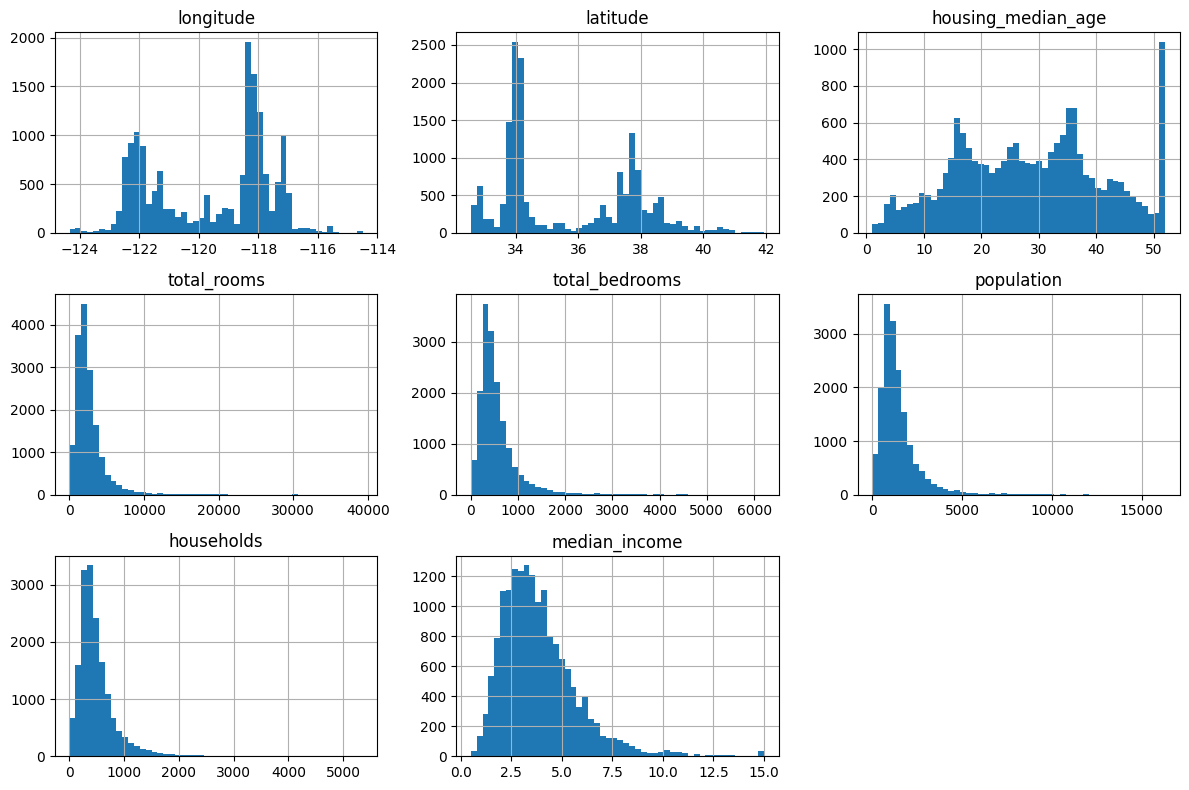

In [112]:
housing_num.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

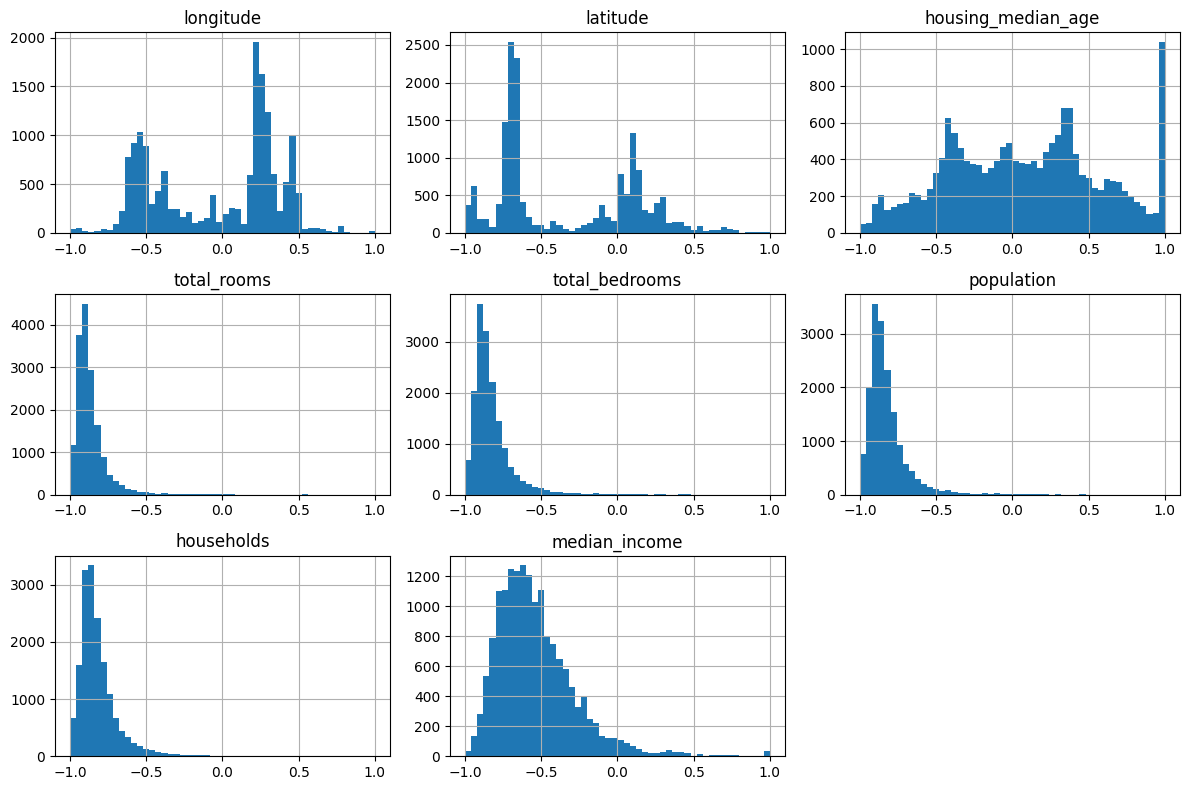

In [113]:
scaled_df.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [114]:
# manually

manually_scaled = (housing_num - housing_num.min()) / (housing_num.max() - housing_num.min())

the_min = -1
the_max = 1
manually_scaled = manually_scaled * (the_max - the_min) + the_min
manually_scaled

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096  -0.608519  0.117021            1.000000    -0.831171       -0.641166   
14973   0.210953 -0.661702            0.529412    -0.900148       -0.886294   
3785   -0.519270  0.236170            0.254902    -0.945012       -0.930424   
14689   0.468560 -0.744681           -0.372549    -0.787782       -0.726204   
20507   0.257606 -0.740426            0.372549    -0.778015       -0.610243   
...          ...       ...                 ...          ...             ...   
14207   0.206897 -0.721277            0.568627    -0.886312       -0.808021   
13105   0.022312 -0.197872           -0.137255    -0.850298       -0.809631   
19301   0.478702 -0.991489           -0.529412    -0.800702       -0.750684   
19121   0.206897 -0.678723            0.411765    -0.807773       -0.719117   
19888  -0.606491  0.087234            0.686275    -0.978178       -0.937510   

       population  households  median_income  
13096   -0.807018   -0.614336      -0.779479  
14973   -0.918660   -0.867090      -0.229293  
3785    -0.931419   -0.924585      -0.733369  
14689   -0.774015   -0.709166      -0.756983  
20507   -0.765796   -0.562815      -0.582171  
...           ...         ...            ...  
14207   -0.885290   -0.805115      -0.419236  
13105   -0.826279   -0.801755      -0.714018  
19301   -0.655134   -0.716632      -0.508738  
19121   -0.788738   -0.687512      -0.497166  
19888   -0.916697   -0.921225      -0.616088  

[16512 rows x 8 columns]

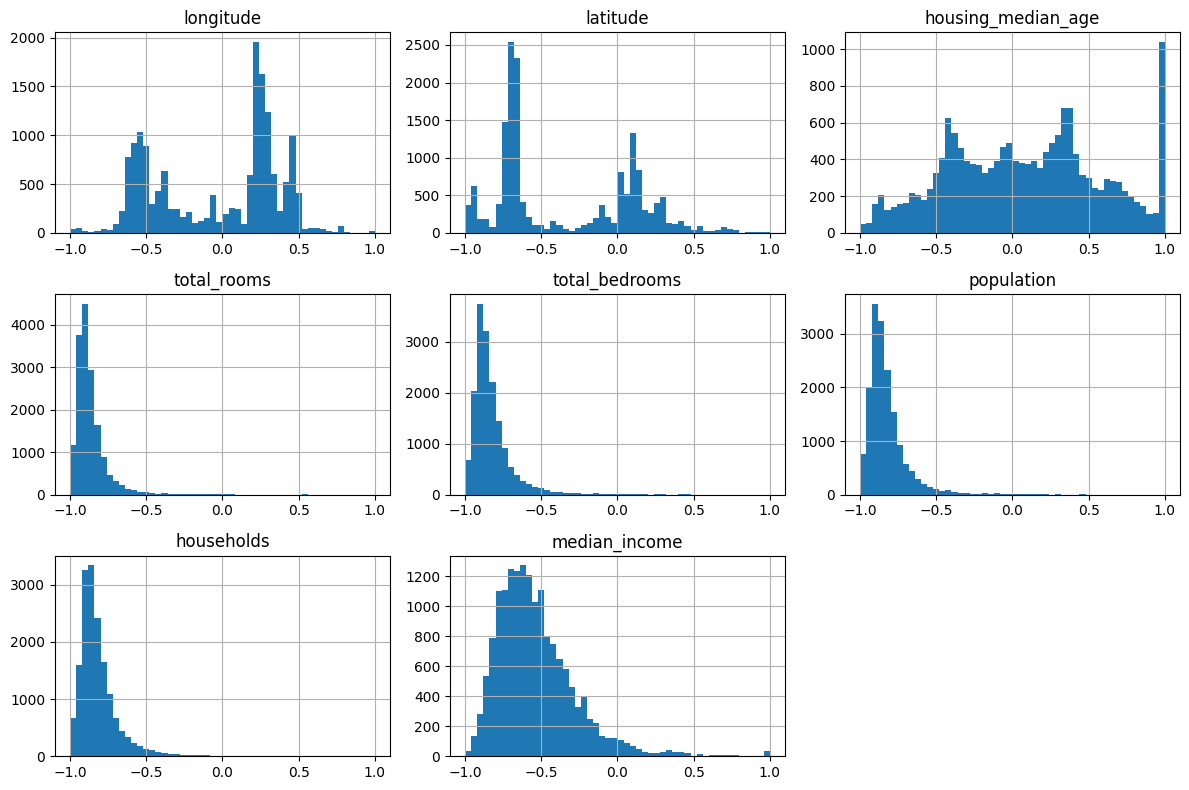

In [115]:
manually_scaled.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

##### `StandardScaler()`

`z = (x - u) / s`

- like z-scores, mean of 0 and std of 1
- less affected by outliers than min-max scaling
- If you want to scale a sparse matrix without converting it to a dense matrix first, you can use a `StandardScaler` with its `with_mean` hyperparameter set to `False`: it will only divide the data by the standard deviation, without subtracting the mean (as this would break sparsity).
- When to use:
	- When features have different scales and distributions (especially when normally distributed).
	- When using algorithms that assume Gaussian-like distributions (e.g., PCA, linear regression, logistic regression, SVM, k-means, LDA).
- Pros:
	- Handles outliers better than MinMaxScaler (not bounded to [0, 1]).
	- Useful for many ML models.
- Cons:
	- Does not bound data to a specific range, which might not be ideal for some applications like neural networks.

In [116]:
std_scaler = StandardScaler()
std_scaler

StandardScaler()

In [117]:
housing_num_std_scaled = std_scaler.fit_transform(housing_num)
housing_num_std_scaled

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

In [118]:
housing_num_std_scaled = pd.DataFrame(housing_num_std_scaled,
                                      columns=housing_num.columns,
                                      index=housing_num.index)
housing_num_std_scaled.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096  -1.423037  1.013606            1.861119     0.311912        1.359094   
14973   0.596394 -0.702103            0.907630    -0.308620       -0.436356   
3785   -1.203098  1.276119            0.351428    -0.712240       -0.759584   
14689   1.231216 -0.884924           -0.919891     0.702262        0.736231   
20507   0.711362 -0.875549            0.589800     0.790125        1.585590   

       population  households  median_income  
13096    0.137460    1.394812      -0.936491  
14973   -0.693771   -0.373485       1.171942  
3785    -0.788768   -0.775727      -0.759789  
14689    0.383175    0.731375      -0.850281  
20507    0.444376    1.755263      -0.180365

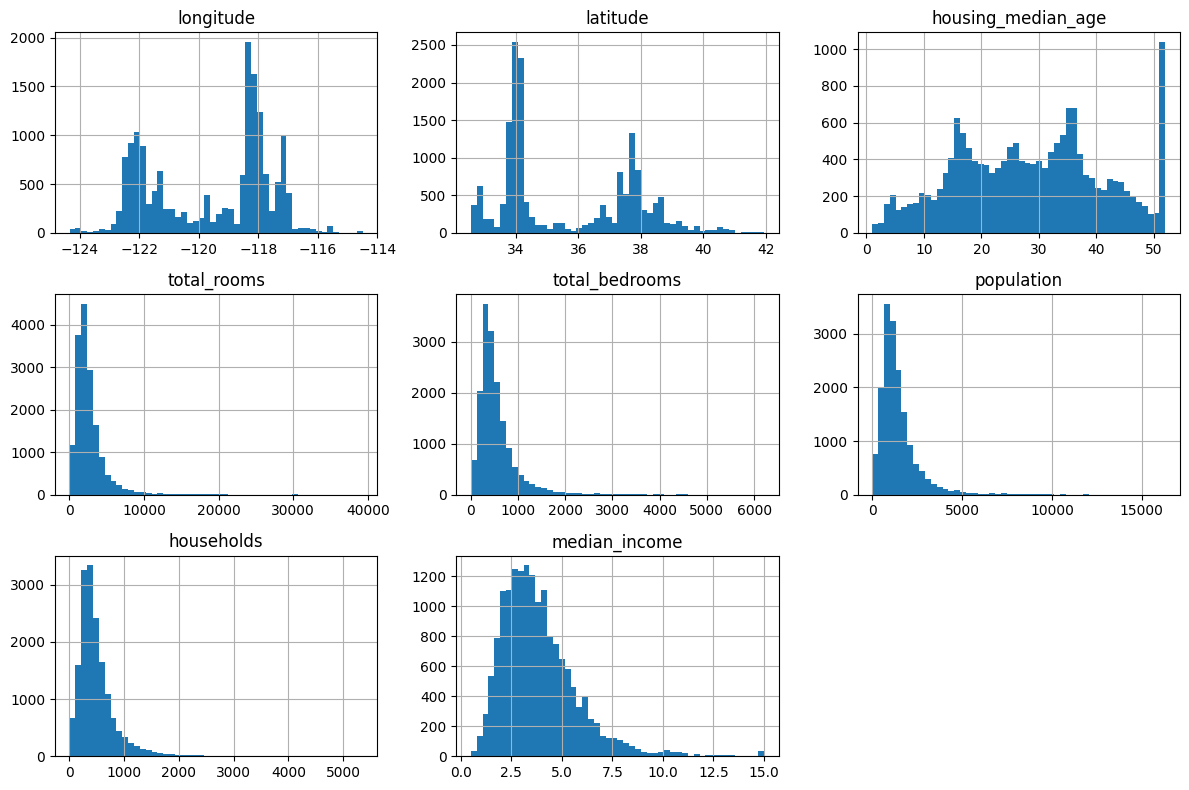

In [119]:
housing_num.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

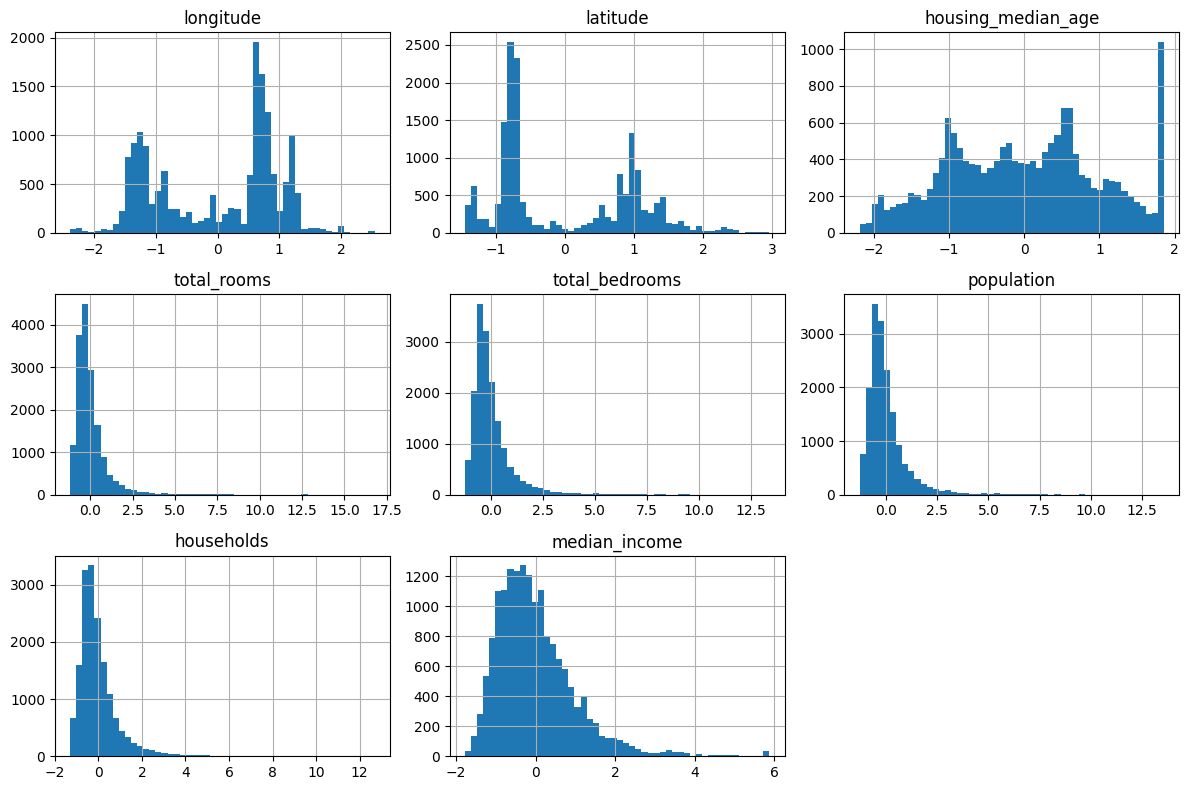

In [120]:
housing_num_std_scaled.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

##### Other Scalers

- **RobustScaler:**
	- Uses median and interquartile range instead of mean and standard deviation.
	- Best for: Data with extreme outliers.
- **Quantile Transformer (Uniform or Normal):**
	- Transforms features into a uniform or normal distribution using quantiles.
	- Best for: Highly skewed data.
- **Power Transformer (Yeo-Johnson, Box-Cox):**
	- Stabilizes variance and makes data more Gaussian-like.
	- Best for: Data with non-linear relationships or high skewness.

| **Scaler**            | **Best for** |
|----------------------|-------------|
| `MinMaxScaler`      | Neural networks, k-NN, SVM (RBF), bounded-range data |
| `StandardScaler`    | PCA, regression, logistic regression, SVM, k-means |
| `RobustScaler`      | Data with outliers |
| `QuantileTransformer` | Highly skewed data |
| `PowerTransformer`  | Non-linear relationships, skewed data |

- If your model is sensitive to feature magnitudes $\rightarrow$ Use MinMaxScaler.
- If your data is normally distributed or you’re using linear models $\rightarrow$ Use StandardScaler.
- If your data has outliers $\rightarrow$ Use RobustScaler.
- If your data is skewed $\rightarrow$ Use Quantile or Power Transformer.

##### Transformations to reduce skew

- This should be done **before** scaling
    - Get rid of the tail
    - If possible, make the distribution roughly symmetrical
- for **positive** features with a heavy tail to the right:
    - replace the feature with it's square root
    - or raise the feature to a power between 0 and 1
    - for a really long tail, replace the feature with it's logarithm
- You can also **bucketize** the feature
    - roughly equal sized buckets
    - for example, replace each value with it's percentile
    - you can further divide by the number of buckets to force it into the 0 to 1 range

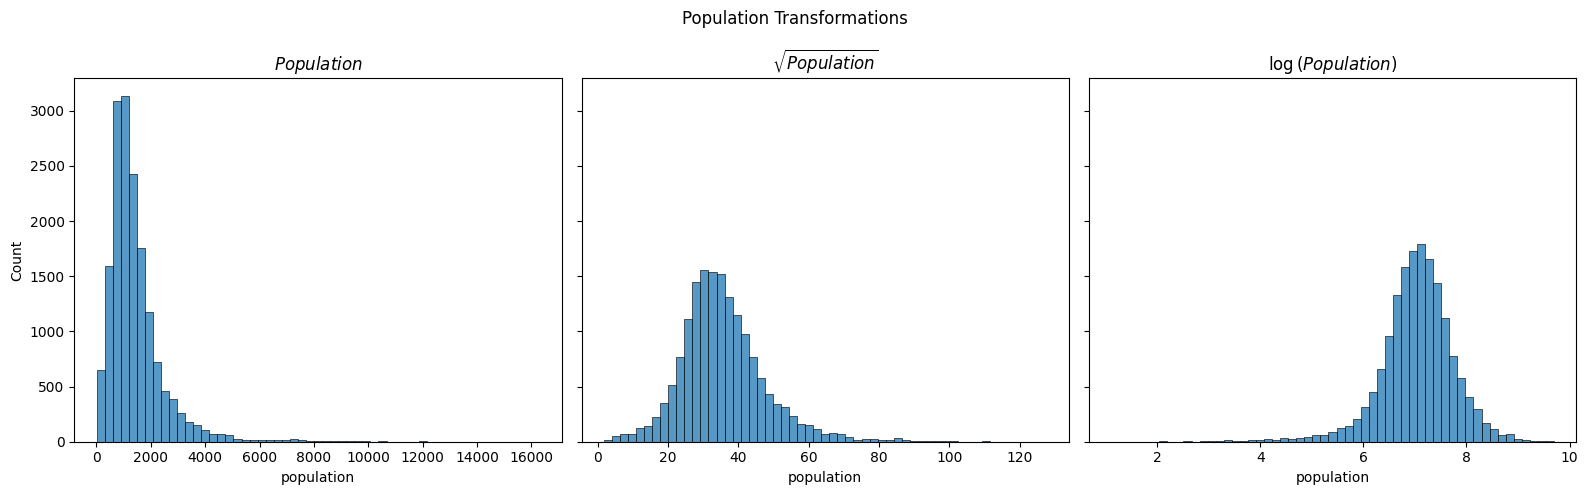

In [121]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)
fig.suptitle('Population Transformations')

sns.histplot(ax=axes[0], x=housing_num['population'], bins=55)
axes[0].set_title('$Population$')

sns.histplot(ax=axes[1], x=np.sqrt(housing_num['population']), bins=55)
axes[1].set_title('$\sqrt{Population}$')

sns.histplot(ax=axes[2], x=np.log(housing_num['population']), bins=55)
axes[2].set_title('$\log{(Population)}$')

plt.tight_layout()

##### What about features with a multimodal distribution?

- Could bucketize the feature, but this time treating the bucket IDs as categories rather than numerical values
    - then use one hot encoding
- Could also add a feature for each of the modes (at least the main ones), representing the similarity between the feature (`housing_median_age`) and a particular mode
    - the similarity feature is typically computed using a ***radial basis function*** or **RBF**
        - which is any function that depends only on the distance between the input value and a fixed point
        - the most commmonly used RBF is the **Gaussian RBF**, whose output value decays exponentially as the input value moves away from the fixed point
            - can be implemented with Scikit-Learn's `rbf_kernel()` function